In [14]:
# Imports
import pandas as pd
import numpy as np
import json
import os
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
sns.set_theme()
sns.set(font="Garuda")

In [15]:
datetime.date

<method 'date' of 'datetime.datetime' objects>

In [16]:
def date_parser(d):
    print(d)
    return pd.to_datetime(datetime([2022,4,21]))
data = pd.read_csv("../data/confirmed-cases-since-120465.csv",
    parse_dates=['announce_date','Notified date'],date_format='%d/%m/%Y')

/tmp/ipykernel_78627/4041333828.py:4: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("../data/confirmed-cases-since-120465.csv",


In [17]:
data

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
0,3905873,2022-04-12,2022-04-11,หญิง,54.0,ปี,Thailand,เชียงใหม่,อยู่ระหว่างการสอบสวน,เชียงใหม่,จอมทอง
1,3905874,2022-04-12,2022-04-11,หญิง,36.0,ปี,Thailand,เชียงใหม่,อยู่ระหว่างการสอบสวน,เชียงใหม่,เมืองเชียงใหม่
2,3905875,2022-04-12,2022-04-11,หญิง,31.0,ปี,Thailand,เชียงใหม่,อยู่ระหว่างการสอบสวน,เชียงใหม่,ดอยหล่อ
3,3905876,2022-04-12,2022-04-11,ชาย,37.0,ปี,Thailand,เชียงใหม่,อยู่ระหว่างการสอบสวน,NaN,ต่างจังหวัด
4,3905877,2022-04-12,2022-04-11,หญิง,33.0,ปี,Thailand,เชียงใหม่,อยู่ระหว่างการสอบสวน,เชียงใหม่,แม่ริม
...,...,...,...,...,...,...,...,...,...,...,...
356607,4262480,2022-05-01,2022-04-30,ชาย,NaN,NaN,NaN,พิษณุโลก,ทัณฑสถาน/เรือนจำ,NaN,NaN
356608,4262481,2022-05-01,2022-04-30,ชาย,NaN,NaN,NaN,ปทุมธานี,ทัณฑสถาน/เรือนจำ,NaN,NaN
356609,4262482,2022-05-01,2022-04-30,หญิง,NaN,NaN,NaN,ปทุมธานี,ทัณฑสถาน/เรือนจำ,NaN,NaN
356610,4262483,2022-05-01,2022-04-30,หญิง,NaN,NaN,NaN,ปทุมธานี,ทัณฑสถาน/เรือนจำ,NaN,NaN


# Pre-preprocessing

Cleaning data

In [18]:
# Clean age

replace_dict = {}
for x in data.age.unique():
    if type(x) == float:
        continue
    replace_dict[x] = float(x)

data.age = data.age.replace(replace_dict)

# Turn age to years

if "Unit" in data:  
    data.loc[data.Unit=='วัน', 'age'] = data.loc[data.Unit=='วัน', 'age'] / 365
    data.loc[data.Unit=='เดือน', 'age'] = data.loc[data.Unit=='เดือน', 'age'] / 12
    data = data.drop(columns=["Unit"])

# Clean province
provice_replacement = {
        'ส\u200bงขลา':'สงขลา',
        'สงขลา\u200b':'สงขลา',
        'นครศรีธรรมราช\u200b':'นครศรีธรรมราช',
        'กาฬสินธ์':'กาฬสินธุ์',
        'จันทรบุรี':'จันทบุรี',
        'นคราชสีมา':'นครราชสีมา',
        'นนทบุุรี':'นนทบุรี',
        'บุรีรัมย์์':'บุรีรัมย์',
        'ปทุุมธานี':'ปทุมธานี',
        'สุทรสาคร':'สมุทรสาคร',
        'สุุโขทัย':'สุโขทัย',
        'หัวไทร':'นครศรีธรรมราช',
        'เมืองนครศรีธรรมราช':'นครศรีธรรมราช',
        'แพร่่':'แพร่',
        'Cambodia':'กัมพูชา',
        'ชอนแก่น':'ขอนแก่น',
        'ฃัยภูมิ':'ชัยภูมิ',
        'อยุธยา':'พระนครศรีอยุธยา',
        'สุมทรสาคร':'สมุทรสาคร'
}
data.province_of_onset = data.province_of_onset.replace(provice_replacement)
data.province_of_isolation = data.province_of_isolation.replace(provice_replacement)

# Clean Risk
data.risk = data.risk.replace({
    'Phang Nga Sandbox ': 'Phang Nga Sandbox',
    'Phang nga Sandbox':'Phang Nga Sandbox',
})

In [19]:
sorted(data.province_of_onset.fillna('na').unique())

['na',
 'กระบี่',
 'กรุงเทพมหานคร',
 'กัมพูชา',
 'กาญจนบุรี',
 'กาฬสินธุ์',
 'กำแพงเพชร',
 'ขอนแก่น',
 'จันทบุรี',
 'ฉะเชิงเทรา',
 'ชลบุรี',
 'ชัยนาท',
 'ชัยภูมิ',
 'ชุมพร',
 'ตรัง',
 'ตราด',
 'ตาก',
 'นครนายก',
 'นครปฐม',
 'นครพนม',
 'นครราชสีมา',
 'นครศรีธรรมราช',
 'นครสวรรค์',
 'นนทบุรี',
 'นราธิวาส',
 'น่าน',
 'บึงกาฬ',
 'บุรีรัมย์',
 'ปทุมธานี',
 'ประจวบคีรีขันธ์',
 'ปราจีนบุรี',
 'ปัตตานี',
 'พระนครศรีอยุธยา',
 'พะเยา',
 'พังงา',
 'พัทลุง',
 'พิจิตร',
 'พิษณุโลก',
 'ภูเก็ต',
 'มหาสารคาม',
 'มุกดาหาร',
 'ยะลา',
 'ยโสธร',
 'ระนอง',
 'ระยอง',
 'ราชบุรี',
 'ร้อยเอ็ด',
 'ลพบุรี',
 'ลำปาง',
 'ลำพูน',
 'ศรีสะเกษ',
 'สกลนคร',
 'สงขลา',
 'สตูล',
 'สมุทรปราการ',
 'สมุทรสงคราม',
 'สมุทรสาคร',
 'สระบุรี',
 'สระแก้ว',
 'สิงห์บุรี',
 'สุพรรณบุรี',
 'สุราษฎร์ธานี',
 'สุรินทร์',
 'สุโขทัย',
 'หนองคาย',
 'หนองบัวลำภู',
 'อำนาจเจริญ',
 'อุดรธานี',
 'อุตรดิตถ์',
 'อุทัยธานี',
 'อุบลราชธานี',
 'อ่างทอง',
 'เชียงราย',
 'เชียงใหม่',
 'เพชรบุรี',
 'เพชรบูรณ์',
 'เลย',
 'แพร่',
 'แม่ฮ่องสอน']

# Preprocessing

In [20]:
def not_outlier(col):
    q1 = col.quantile(0.25)
    q3 = col.quantile(0.75)
    iqr = q3-q1
    max_val = q3+1.5*iqr
    min_val = q1-1.5*iqr
    x = ((col <= max_val) & (col >= min_val)) | col.isna()
    return x

In [21]:
data

,No.,announce_date,Notified date,sex,age,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
0,3905873,2022-04-12,2022-04-11,หญิง,54.0,Thailand,เชียงใหม่,อยู่ระหว่างการสอบสวน,เชียงใหม่,จอมทอง
1,3905874,2022-04-12,2022-04-11,หญิง,36.0,Thailand,เชียงใหม่,อยู่ระหว่างการสอบสวน,เชียงใหม่,เมืองเชียงใหม่
2,3905875,2022-04-12,2022-04-11,หญิง,31.0,Thailand,เชียงใหม่,อยู่ระหว่างการสอบสวน,เชียงใหม่,ดอยหล่อ
3,3905876,2022-04-12,2022-04-11,ชาย,37.0,Thailand,เชียงใหม่,อยู่ระหว่างการสอบสวน,NaN,ต่างจังหวัด
4,3905877,2022-04-12,2022-04-11,หญิง,33.0,Thailand,เชียงใหม่,อยู่ระหว่างการสอบสวน,เชียงใหม่,แม่ริม
...,...,...,...,...,...,...,...,...,...,...
356607,4262480,2022-05-01,2022-04-30,ชาย,NaN,NaN,พิษณุโลก,ทัณฑสถาน/เรือนจำ,NaN,NaN
356608,4262481,2022-05-01,2022-04-30,ชาย,NaN,NaN,ปทุมธานี,ทัณฑสถาน/เรือนจำ,NaN,NaN
356609,4262482,2022-05-01,2022-04-30,หญิง,NaN,NaN,ปทุมธานี,ทัณฑสถาน/เรือนจำ,NaN,NaN
356610,4262483,2022-05-01,2022-04-30,หญิง,NaN,NaN,ปทุมธานี,ทัณฑสถาน/เรือนจำ,NaN,NaN


In [22]:
d1 = data.copy()

In [23]:
d1 = data.copy()
# Remove outlier
d1 = d1[not_outlier(d1.age)]

# Remove missing

## age data
d1.age = d1.age.fillna(d1.age.mean())

## nationality
d1.nationality = d1.nationality.fillna(d1.nationality.mode()[0])

## One Hot Encoding: Thai & non-Thai
d1["is_thai"] = (d1.nationality == "Thailand")
d1.loc[d1.nationality.isna(), "is_thai"] = pd.NA
d1["not_thai"] = d1.nationality != "Thailand"
d1.loc[d1.nationality.isna(), "not_thai"] = pd.NA

## One Hot Encoding: Male & Female
d1["male"] = (d1.sex == "ชาย")
d1.loc[d1.sex.isna(), "male"] = pd.NA
d1["female"] = (d1.sex == "หญิง")
d1.loc[d1.sex.isna(), "female"] = pd.NA

## Feature reduction

regions = {
	"N":[
		"เชียงราย", "เชียงใหม่", "แม่ฮ่องสอน", "พะเยา", "น่าน", "ลำพูน", "ลำปาง",
		"แพร่", "อุตรดิตถ์", "ตาก", "สุโขทัย", "พิษณุโลก", "เพชรบูรณ์", "กำแพงเพชร",
		"พิจิตร", "นครสวรรค์", "อุทัยธานี",
	],
	"NE":[
		"บึงกาฬ", "หนองคาย", "อุดรธานี", "สกลนคร", "นครพนม", "หนองบัวลำภู", "เลย",
		"ขอนแก่น", "กาฬสินธุ์", "มุกดาหาร", "ชัยภูมิ", "มหาสารคาม", "ร้อยเอ็ด", "ยโสธร",
		"อำนาจเจริญ", "นครราชสีมา", "บุรีรัมย์", "สุรินทร์", "ศรีสะเกษ", "อุบลราชธานี",
	],
	"C":[
		"กาญจนบุรี", "ชัยนาท", "ลพบุรี", "สิงห์บุรี", "สุพรรณบุรี", "อ่างทอง", "สระบุรี",
		"พระนครศรีอยุธยา", "นครปฐม", "นนทบุรี", "ปทุมธานี", "กรุงเทพมหานคร", "ราชบุรี", "สมุทรสาคร",
		"สมุทรสงคราม", "เพชรบุรี", "ประจวบคีรีขันธ์",
	],
	"E":[
		"นครนายก", "ปราจีนบุรี", "สระแก้ว", "ฉะเชิงเทรา", "สมุทรปราการ", "ชลบุรี",
		"จันทบุรี", "ระยอง", "ตราด",
	],
	"S":[
		"ชุมพร", "ระนอง", "สุราษฎร์ธานี", "พังงา", "นครศรีธรรมราช", "ภูเก็ต", "กระบี่", "ตรัง",
		"พัทลุง", "สตูล", "สงขลา", "ปัตตานี", "ยะลา", "นราธิวาส",
	],
    "Foreign":[
        'กัมพูชา'
    ]
}

def find_region(province):
    for r in regions:
        if province in regions[r]:
            return r
    return None

d1["region_of_onset"] = d1.province_of_onset.apply(find_region)
d1["region_of_isolation"] = d1.province_of_isolation.apply(find_region)


# Region of Isolation
one_hot = pd.get_dummies(d1.region_of_isolation)

d1 = d1.join(one_hot)

d1 = d1.drop(columns=["region_of_isolation"])


## Discretization: Binning age
d1["age_range"] = pd.cut(d1.age,10)

encoder = LabelEncoder()
scaler = StandardScaler()
# Label Encoding: Age
encoder.fit(sorted(d1.age_range.unique()))
f = encoder.transform(d1.age_range)
f = f.reshape(-1,1)
scaler.fit(f)
f = scaler.transform(f)
d1["age_range"] = f

encoder = LabelEncoder()
scaler = StandardScaler()
# Label Encoding: Risk
encoder.fit(d1.risk)
f = encoder.transform(d1.risk)
f = f.reshape(-1,1)
scaler.fit(f)
f = scaler.transform(f)
d1["risk"] = f

In [24]:
d1

,No.,announce_date,Notified date,sex,age,nationality,province_of_isolation,risk,province_of_onset,district_of_onset,...,not_thai,male,female,region_of_onset,C,E,N,NE,S,age_range
0,3905873,2022-04-12,2022-04-11,หญิง,54.000000,Thailand,เชียงใหม่,-0.000382,เชียงใหม่,จอมทอง,...,False,False,True,N,False,False,True,False,False,0.692992
1,3905874,2022-04-12,2022-04-11,หญิง,36.000000,Thailand,เชียงใหม่,-0.000382,เชียงใหม่,เมืองเชียงใหม่,...,False,False,True,N,False,False,True,False,False,-0.281111
2,3905875,2022-04-12,2022-04-11,หญิง,31.000000,Thailand,เชียงใหม่,-0.000382,เชียงใหม่,ดอยหล่อ,...,False,False,True,N,False,False,True,False,False,-0.281111
3,3905876,2022-04-12,2022-04-11,ชาย,37.000000,Thailand,เชียงใหม่,-0.000382,NaN,ต่างจังหวัด,...,False,True,False,None,False,False,True,False,False,-0.281111
4,3905877,2022-04-12,2022-04-11,หญิง,33.000000,Thailand,เชียงใหม่,-0.000382,เชียงใหม่,แม่ริม,...,False,False,True,N,False,False,True,False,False,-0.281111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356607,4262480,2022-05-01,2022-04-30,ชาย,40.689087,Thailand,พิษณุโลก,-4.160614,NaN,NaN,...,False,True,False,None,False,False,True,False,False,0.205940
356608,4262481,2022-05-01,2022-04-30,ชาย,40.689087,Thailand,ปทุมธานี,-4.160614,NaN,NaN,...,False,True,False,None,True,False,False,False,False,0.205940
356609,4262482,2022-05-01,2022-04-30,หญิง,40.689087,Thailand,ปทุมธานี,-4.160614,NaN,NaN,...,False,False,True,None,True,False,False,False,False,0.205940
356610,4262483,2022-05-01,2022-04-30,หญิง,40.689087,Thailand,ปทุมธานี,-4.160614,NaN,NaN,...,False,False,True,None,True,False,False,False,False,0.205940


## Visualization

[Text(0, 0, 'N'),
 Text(1, 0, 'NE'),
 Text(2, 0, 'C'),
 Text(3, 0, 'E'),
 Text(4, 0, 'S'),
 Text(5, 0, 'Foreign')]

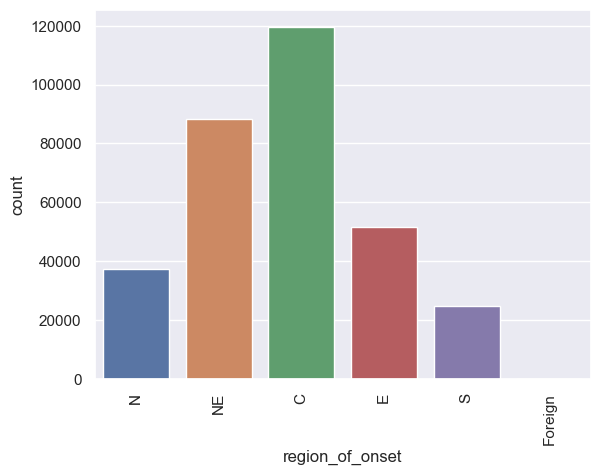

In [25]:
g = sns.countplot(d1[["region_of_onset"]],x="region_of_onset")
g.set_xticklabels(g.get_xticklabels(),rotation=90)

## Gender, Age, Risk, Region of Onset, -> Risk

Testing & Training Data

In [26]:

d2 = d1[["male","female","age_range","risk","is_thai","not_thai","N","NE","S","E","C"]]

In [27]:
y = d2[["risk"]]
x = d2.drop(columns=["risk"])

x

,male,female,age_range,is_thai,not_thai,N,NE,S,E,C
0,False,True,0.692992,True,False,True,False,False,False,False
1,False,True,-0.281111,True,False,True,False,False,False,False
2,False,True,-0.281111,True,False,True,False,False,False,False
3,True,False,-0.281111,True,False,True,False,False,False,False
4,False,True,-0.281111,True,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
356607,True,False,0.205940,True,False,True,False,False,False,False
356608,True,False,0.205940,True,False,False,False,False,False,True
356609,False,True,0.205940,True,False,False,False,False,False,True
356610,False,True,0.205940,True,False,False,False,False,False,True


In [28]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [29]:
x_train

,male,female,age_range,is_thai,not_thai,N,NE,S,E,C
141405,True,False,1.667094,True,False,True,False,False,False,False
148973,True,False,-0.768162,True,False,False,True,False,False,False
155394,True,False,0.205940,True,False,False,False,False,False,True
205191,True,False,-0.281111,True,False,False,False,False,False,True
88781,True,False,1.180043,True,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
122587,True,False,0.205940,True,False,False,False,False,False,True
304157,False,True,-0.768162,True,False,True,False,False,False,False
152326,False,True,-1.742265,True,False,False,True,False,False,False
117958,False,True,0.205940,True,False,False,True,False,False,False


In [30]:
y_train

,risk
141405,-0.320400
148973,-0.320400
155394,0.639653
205191,-0.320400
88781,0.639653
...,...
122587,0.639653
304157,-3.840596
152326,-0.320400
117958,-0.320400


In [31]:
x_test

,male,female,age_range,is_thai,not_thai,N,NE,S,E,C
43224,True,False,0.692992,True,False,True,False,False,False,False
114402,True,False,-0.768162,True,False,False,True,False,False,False
179500,False,True,-0.768162,True,False,True,False,False,False,False
55661,True,False,-1.742265,True,False,False,True,False,False,False
321459,True,False,-0.281111,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...
140255,True,False,-1.742265,True,False,False,False,False,False,True
343069,True,False,-1.255214,True,False,False,False,False,False,True
333078,False,True,1.667094,True,False,True,False,False,False,False
105718,False,True,-0.281111,True,False,False,False,False,False,True


In [32]:
y_test

,risk
43224,-0.320400
114402,0.639653
179500,0.639653
55661,0.639653
321459,-0.320400
...,...
140255,0.639653
343069,0.639653
333078,0.639653
105718,0.639653
